In [66]:
library(tidyverse)
library(readxl)
heart <-read_excel("/kaggle/input/heart-diseases/heart.xlsx")
head(heart, 10)

counts of patient,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
4,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
6,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
7,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
8,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
9,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0


# histogram  of the dependent variables

## histogram  of age of patient

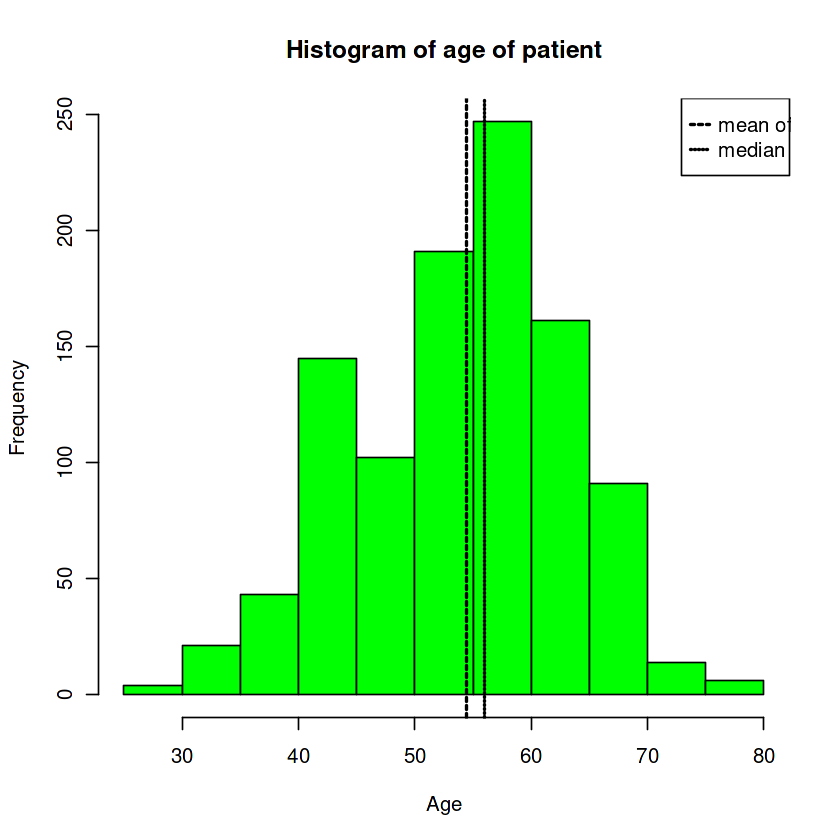

In [67]:
hist(heart$age,col ="green",
     main = "Histogram of age of patient", xlab = "Age")
abline(v=c(mean(heart$age),median(heart$age)),
       lty=c(2,3), lwd =2)
legend("topright", legend=c("mean of age","median of age"),
       lty=c(2,3),lwd =2)

## histogram  of trestbps of patient

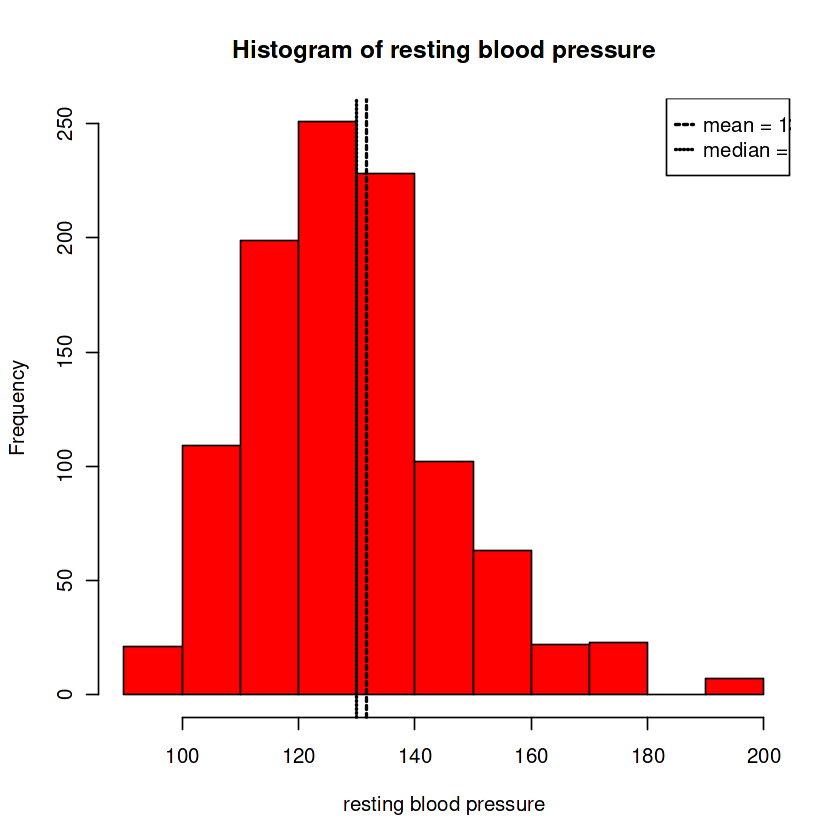

In [68]:
hist(heart$trestbps, col="red",
     main ="Histogram of resting blood pressure",
     xlab = "resting blood pressure" )
abline(v=c(mean(heart$trestbps),
           median(heart$trestbps)), 
       lty=c(2,3), lwd =2) 
legend("topright", legend=c("mean = 131.6117","median = 130"),
       lty=c(2,3),lwd =2)

## histogram  of cholesterol  of patient

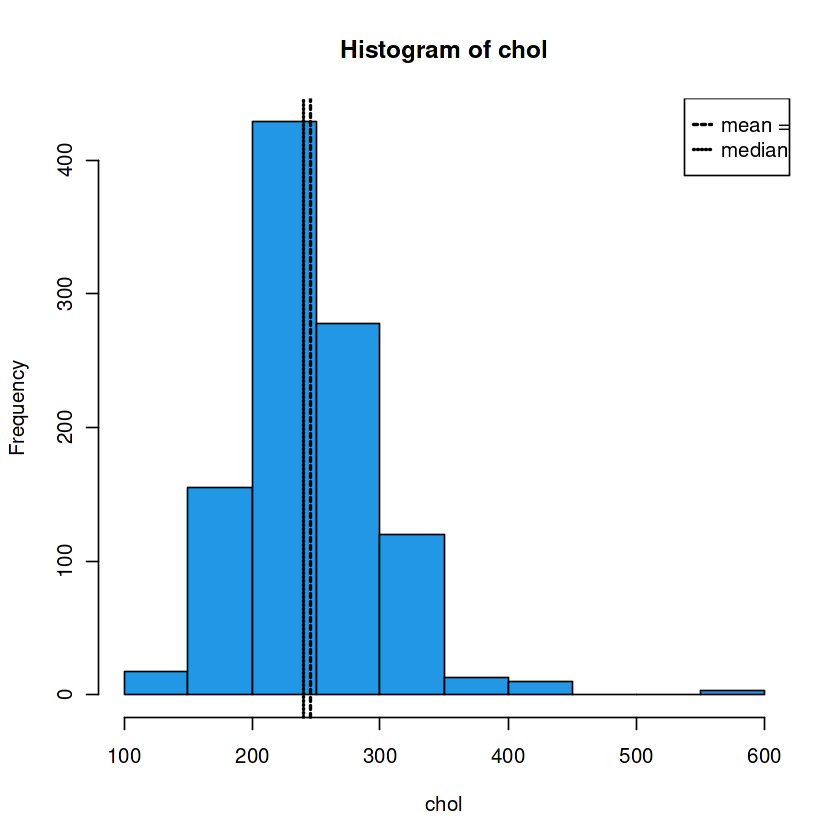

In [69]:

hist(heart$chol,main="Histogram of chol", 
     xlab = "chol", col =4)
abline(v=c(mean(heart$chol),
           median(heart$chol)), 
       lty=c(2,3), lwd =2)
legend("topright", legend=c("mean = 246 ","median = 240"), 
       lty=c(2,3),lwd =2)

## histogram  of thalach of patient

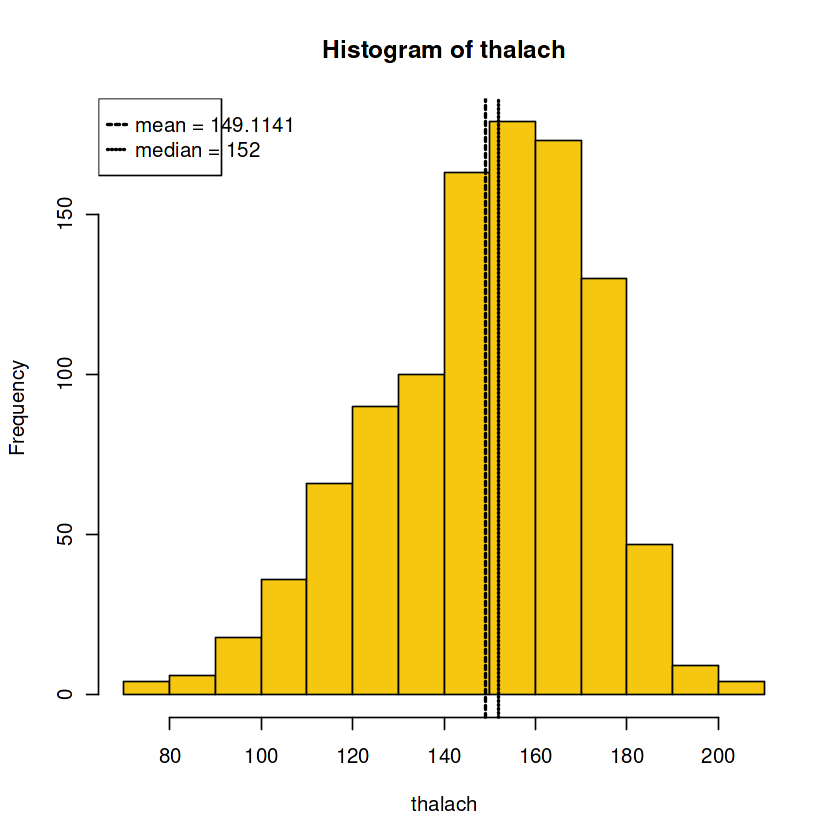

In [70]:
hist(heart$thalach,col =7, 
     main ="Histogram of thalach", xlab = "thalach")
abline(v=c(mean(heart$thalach),
           median(heart$thalach)), 
       lty=c(2,3), lwd =2)
legend("topleft", legend=c("mean = 149.1141","median = 152"), 
       lty=c(2,3),lwd =2)

# Coverting categorical variables to factor with labelling

In [71]:
sex <-as.factor(heart$sex)
levels(sex) <-c("male","female")
cp <-as.factor(heart$cp)
levels(cp) <-c("heart attack","angina","pericarditis","myocarditis")
fbs <-as.factor(heart$fbs)
levels(fbs) <-c("lower","higher")
restecg <-as.factor(heart$restecg)
levels(restecg) <-c("slow","normal","fast")
exang <-as.factor(heart$exang)
levels(exang) <-c("stable","unstable")
slope <-as.factor(heart$slope)
levels(slope) <-c("downsloping","normal","upsloping")
ca <-as.factor(heart$ca)
levels(ca) <-c("0 color","1 color","2 color", "3 color", "4 color")
thal <-as.factor(heart$thal)
levels(thal) <-c("normal","normal defect", "fixed defect", "reversable defect")
target <-as.factor(heart$target)
levels(target) <-c("no disease","disease")
selected <-select(heart, age, trestbps,chol,thalach,oldpeak)
heart_1 <-cbind(selected,cp,fbs,restecg,exang,slope,sex,ca,thal,target)
head(heart_1,10)

,age,trestbps,chol,thalach,oldpeak,cp,fbs,restecg,exang,slope,sex,ca,thal,target
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,52,125,212,168,1.0,heart attack,lower,normal,stable,upsloping,female,2 color,reversable defect,no disease
2,53,140,203,155,3.1,heart attack,higher,slow,unstable,downsloping,female,0 color,reversable defect,no disease
3,70,145,174,125,2.6,heart attack,lower,normal,unstable,downsloping,female,0 color,reversable defect,no disease
4,61,148,203,161,0.0,heart attack,lower,normal,stable,upsloping,female,1 color,reversable defect,no disease
5,62,138,294,106,1.9,heart attack,higher,normal,stable,normal,male,3 color,fixed defect,no disease
6,58,100,248,122,1.0,heart attack,lower,slow,stable,normal,male,0 color,fixed defect,disease
7,58,114,318,140,4.4,heart attack,lower,fast,stable,downsloping,female,3 color,normal defect,no disease
8,55,160,289,145,0.8,heart attack,lower,slow,unstable,normal,female,1 color,reversable defect,no disease
9,46,120,249,144,0.8,heart attack,lower,slow,stable,upsloping,female,0 color,reversable defect,no disease



## plotting oldpeak by target


[1] 1098.3

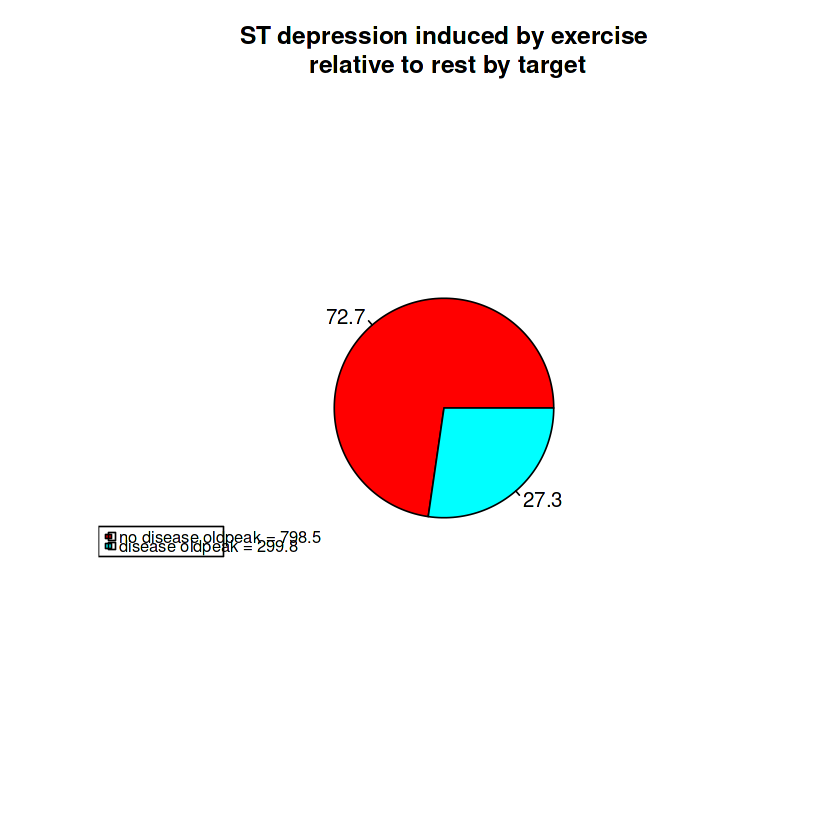

In [72]:
no_disease <-heart_1%>% filter(target=="no disease")
disease <-filter(heart_1, target=="disease")
oldpeak_nd <-select(no_disease, oldpeak)
oldpeak_d <-select(disease, oldpeak)
fs_oldpeak_T <-sum(oldpeak_nd)
ms_oldpeak_T <-sum(oldpeak_d)
grand_oldpeak_T <-fs_oldpeak_T+ms_oldpeak_T
grand_oldpeak_T
oldpeak <-c(fs_oldpeak_T,ms_oldpeak_T)
pie_p <-round(100*oldpeak/grand_oldpeak_T,1)
pie(oldpeak, labels=pie_p, col=rainbow(length(oldpeak)), main="ST depression induced by exercise\n relative to rest by target")
legend("bottomleft", legend =c("no disease oldpeak = 798.5 ", "disease oldpeak = 299.8"),cex=0.8,pch=0.8, fill =rainbow(length(oldpeak)))

## plotting thalach by target



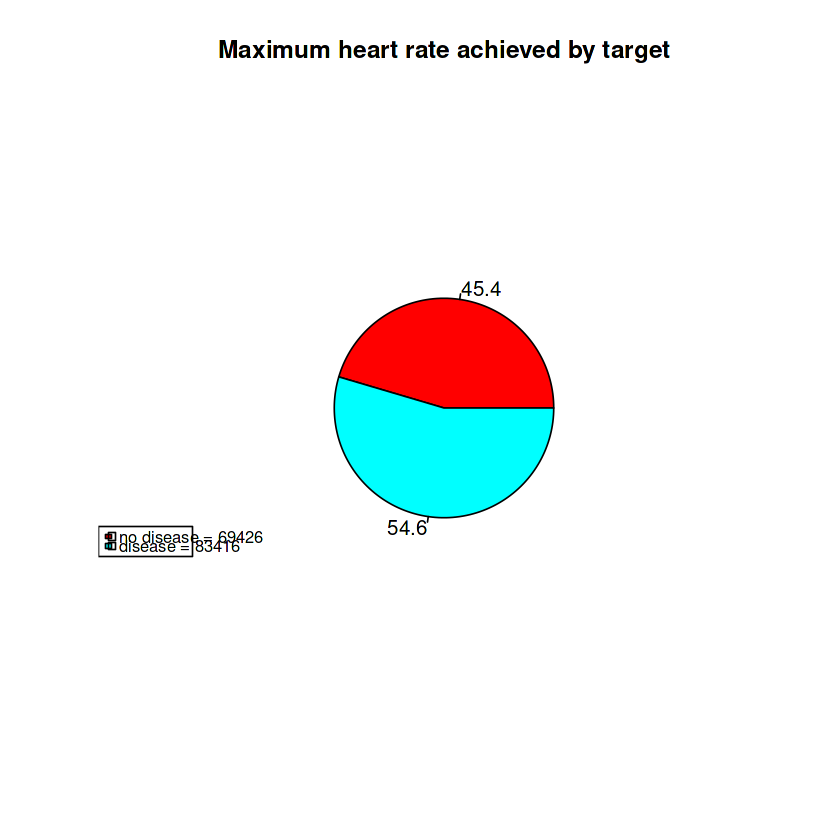

In [73]:
thalach_dn <-select(no_disease, thalach)
thalach_d <-select(disease, thalach)
fs_thalach_T <-sum(thalach_dn)
ms_thalach_T <-sum(thalach_d)
grand_thalach <-fs_thalach_T+ms_thalach_T
thalach_T <-c(fs_thalach_T, ms_thalach_T)
pie_thalach <-round(100*thalach_T/grand_thalach,1)
pie(thalach_T, labels=pie_thalach, main ="Maximum heart rate achieved by target",
    col =rainbow(length(thalach_T)))
legend("bottomleft", legend =c("no disease = 69426", "disease = 83416"),
       cex =0.8, pch =0.8, fill =rainbow(length(thalach_T)))

## plotting chol by target

In [ ]:
chol_nd_T <-select(no_disease, chol)
chol_d_T <-select(disease, chol)
nds_chol_T <-sum(chol_nd_T)
ds_chol_T <-sum(chol_d_T)
grand_chol_T <-nds_chol_T+ds_chol_T
grand_chol_T
chol_T <-c(nds_chol_T, ds_chol_T)
pie_chol_T <-round(100*chol_T/grand_chol_T,1)
pie(chol_T, labels =pie_chol_T, col =rainbow(length(chol_T)), main ="Serum cholestoral(mg/dl) by target")
legend("bottomleft", legend=c("no disease = 125395", "disease = 126755 "), cex =0.8, pch=0.8, fill=rainbow(length(chol_T)))

## plotting tresbps by target

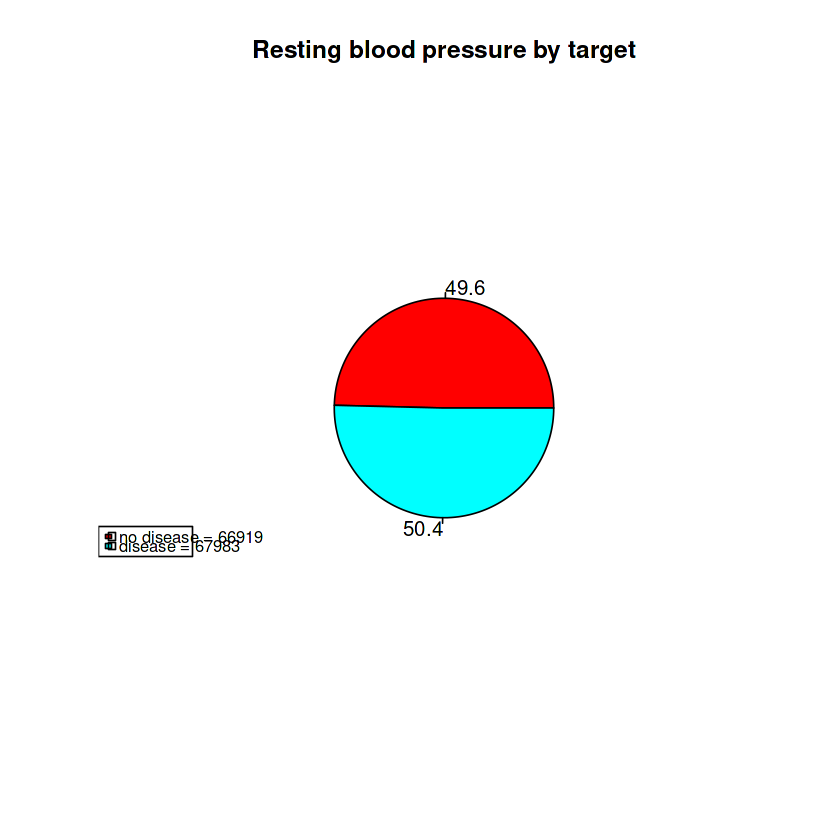

In [75]:
trestbps_nd_T <-select(no_disease, trestbps)
trestbps_d_T <-select(disease, trestbps)
nds_trestbps_T <-sum(trestbps_nd_T)
ds_trestbps_T <-sum(trestbps_d_T)
grand_trestbps_T <-nds_trestbps_T+ds_trestbps_T
trestbps_T <-c(nds_trestbps_T, ds_trestbps_T)
pie_trestbps_T <-round(100*trestbps_T/grand_trestbps_T,1)
pie(trestbps_T, labels=pie_trestbps_T, col =rainbow(length(trestbps_T)),
            main ="Resting blood pressure by target")
legend("bottomleft", legend =c("no disease = 66919","disease = 67983"),
       cex =0.8, pch =0.8, fill=rainbow(length(trestbps_T)))

## Discriptive Statistic of the continous variables

In [76]:

cor <-select(heart_1, age, chol, trestbps, thalach, oldpeak)
summary(cor)

      age             chol        trestbps        thalach         oldpeak     
 Min.   :29.00   Min.   :126   Min.   : 94.0   Min.   : 71.0   Min.   :0.000  
 1st Qu.:48.00   1st Qu.:211   1st Qu.:120.0   1st Qu.:132.0   1st Qu.:0.000  
 Median :56.00   Median :240   Median :130.0   Median :152.0   Median :0.800  
 Mean   :54.43   Mean   :246   Mean   :131.6   Mean   :149.1   Mean   :1.072  
 3rd Qu.:61.00   3rd Qu.:275   3rd Qu.:140.0   3rd Qu.:166.0   3rd Qu.:1.800  
 Max.   :77.00   Max.   :564   Max.   :200.0   Max.   :202.0   Max.   :6.200  

## Correlation Analysis

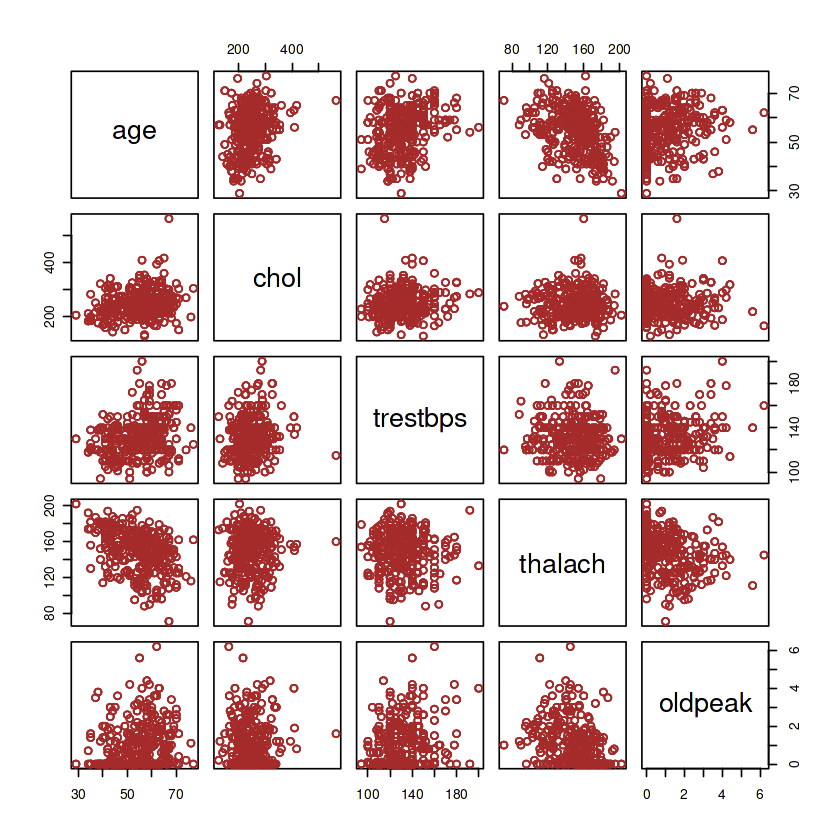

In [77]:
plot(cor, col="brown")

In [78]:
cor(cor)

,age,chol,trestbps,thalach,oldpeak
age,1.0000000,0.21982253,0.27112141,-0.39022708,0.20813668
chol,0.2198225,1.00000000,0.12797743,-0.02177209,0.06488031
trestbps,0.2711214,0.12797743,1.00000000,-0.03926407,0.18743411
thalach,-0.3902271,-0.02177209,-0.03926407,1.00000000,-0.34979616
oldpeak,0.2081367,0.06488031,0.18743411,-0.34979616,1.00000000


## Checking if the target variable is balance

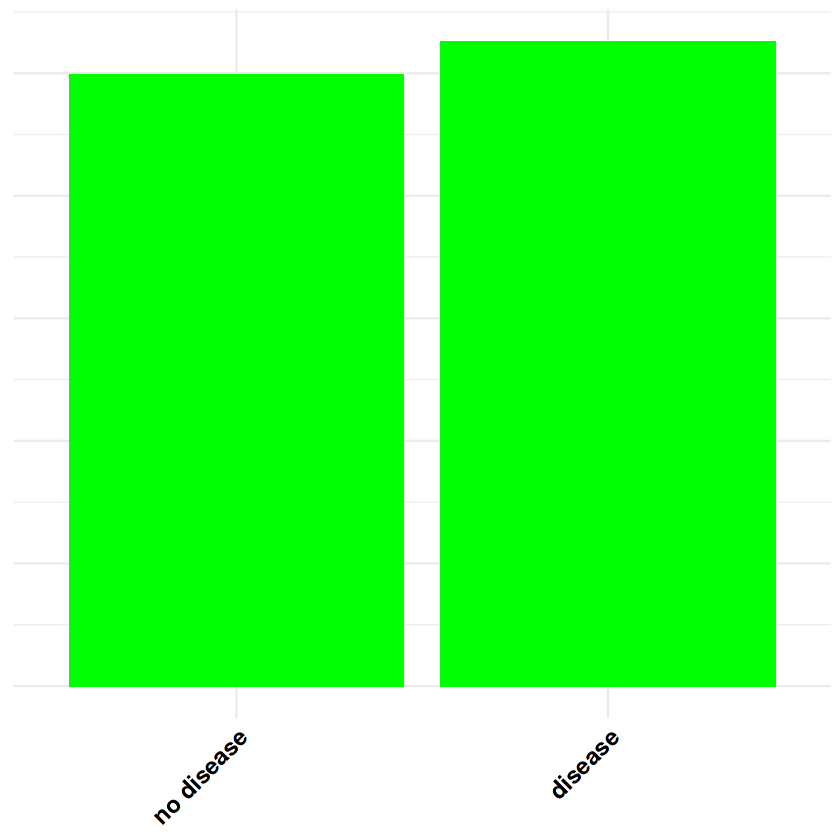

In [79]:
ggplot(heart_1, aes(x = target))+geom_bar(fill="green")+
  theme_minimal() +
  theme(
    axis.title.x = element_blank(),  
    axis.text.x = element_text(angle = 45, hjust = 1, face = "bold", colour = "black", size = 14), 
    axis.title.y = element_blank(),  
    axis.text.y = element_blank(),  
    axis.ticks.y = element_blank()  
  )

## Data Partition

In [80]:
library(caTools)
sample <- sample.split(heart_1$target, SplitRatio = 0.7)
Train <- subset(heart_1, sample==T)
Test <- subset(heart_1, sample==F)

# Training the models

## **MODEL1**:Predicting heart diseases situation with thalach

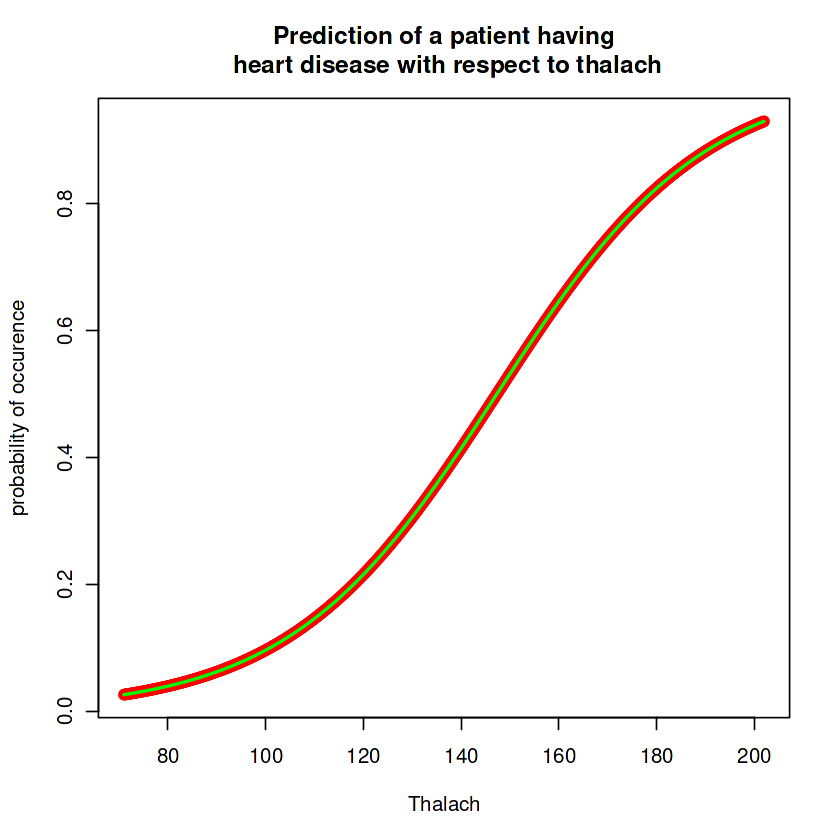

In [81]:
model1 <-glm(target~thalach, data=Train, family="binomial")
prM1_data <-data.frame(thalach=seq(min(Train$thalach), max(Train$thalach), length=1025))
prM1_data$target <-predict(model1, prM1_data, type="response")
plot(target~thalach, data=prM1_data, col="red", xlab="Thalach",
     ylab="probability of occurence",main="Prediction of a patient having\n heart disease with respect to thalach")
lines(target~thalach, prM1_data,col="green", lwd=2)

## **MODEL2**: Predicting heart diseases situation with age


Call:
glm(formula = target ~ age, family = "binomial", data = Train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6825  -1.1277   0.7459   1.1124   1.6661  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.04786    0.49436   6.165 7.04e-10 ***
age         -0.05459    0.00888  -6.147 7.87e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 993.47  on 716  degrees of freedom
Residual deviance: 952.87  on 715  degrees of freedom
AIC: 956.87

Number of Fisher Scoring iterations: 4


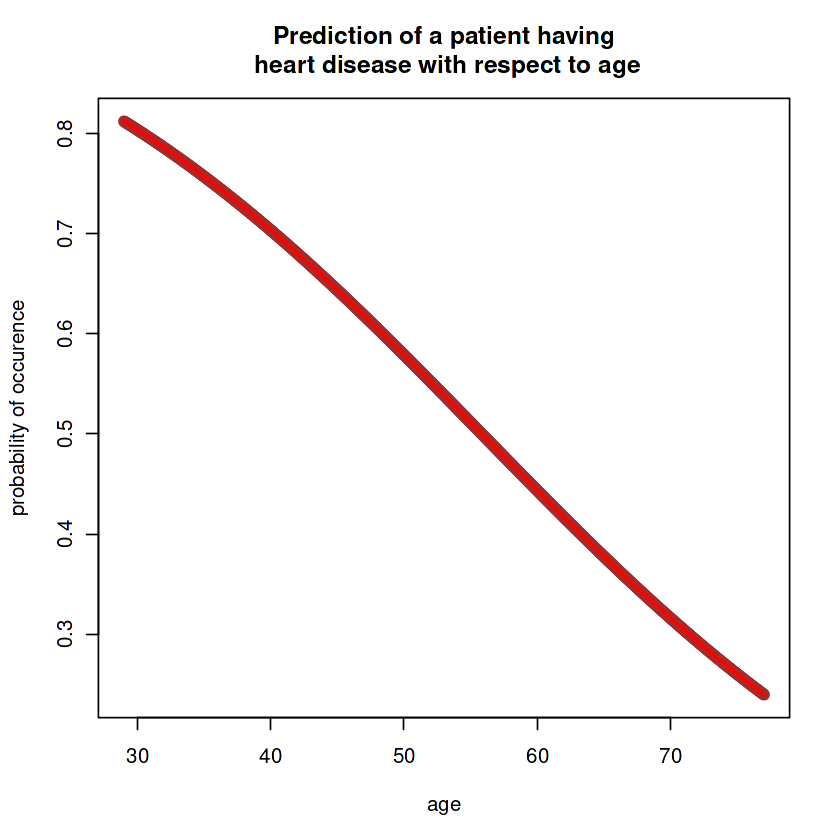

In [82]:
 model2 <-glm(target~age, data=Train, family="binomial")
summary(model2)
pre2_data <-data.frame(age=seq(min(Train$age), max(Train$age), length=1025))
pre2_data$target <-predict(model2, pre2_data, type="response")
plot(target~age, data=pre2_data, col="brown", xlab="age",
     ylab="probability of occurence",main="Prediction of a patient having\n heart disease with respect to age")
lines(target~age,col="red", cex=2, pre2_data, lwd=2)

## **MODEL3** :Predicting heart diseases situation with trestbps


Call:
glm(formula = target ~ trestbps, family = "binomial", data = Train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.472  -1.198   0.909   1.140   1.567  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.61067    0.59349   4.399 1.09e-05 ***
trestbps    -0.01940    0.00447  -4.341 1.42e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 993.47  on 716  degrees of freedom
Residual deviance: 973.70  on 715  degrees of freedom
AIC: 977.7

Number of Fisher Scoring iterations: 4


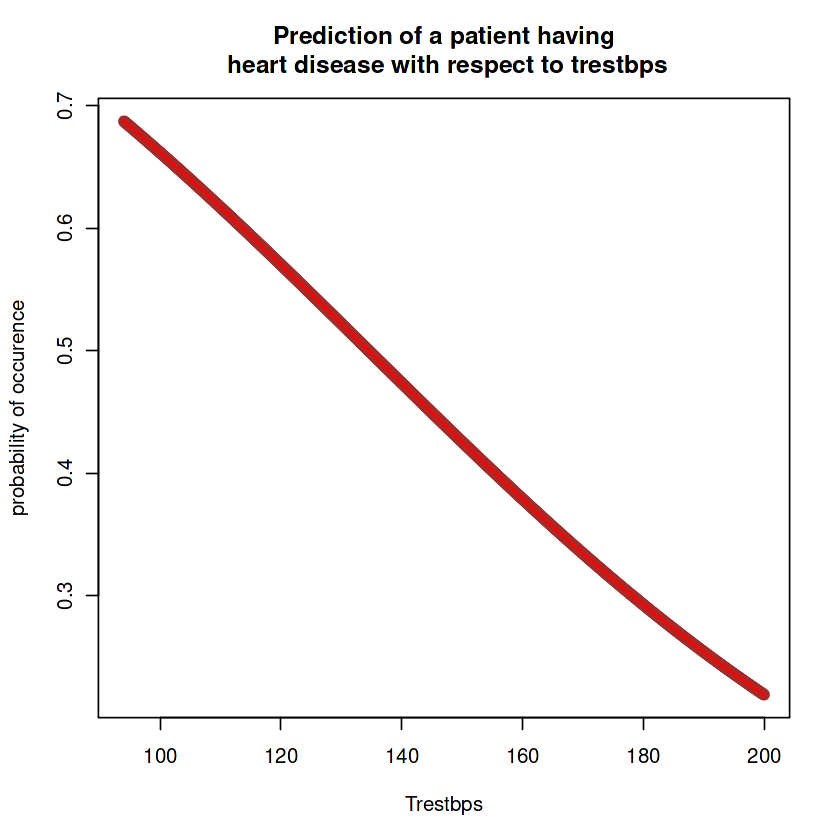

In [83]:
# Making prediction using trestbps
model3 <-glm(target~trestbps, data=Train, family="binomial")
summary(model3)
pre3_data <-data.frame(trestbps=seq(min(Train$trestbps), max(Train$trestbps), length=1025))
pre3_data$target <-predict(model3, pre3_data, type="response")
plot(target~trestbps, data=pre3_data,col="brown", xlab="Trestbps",
     ylab="probability of occurence",main="Prediction of a patient having\n heart disease with respect to trestbps")
lines(target~trestbps, pre3_data,col="red",lty=2,cex=2, lwd=2)

## **MODEL4**:Predicting heart diseases situation with cholesterol


Call:
glm(formula = target ~ chol, family = "binomial", data = Train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.363  -1.190   1.036   1.139   1.606  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept)  0.848119   0.369729   2.294   0.0218 *
chol        -0.003218   0.001466  -2.195   0.0282 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 993.47  on 716  degrees of freedom
Residual deviance: 988.55  on 715  degrees of freedom
AIC: 992.55

Number of Fisher Scoring iterations: 4


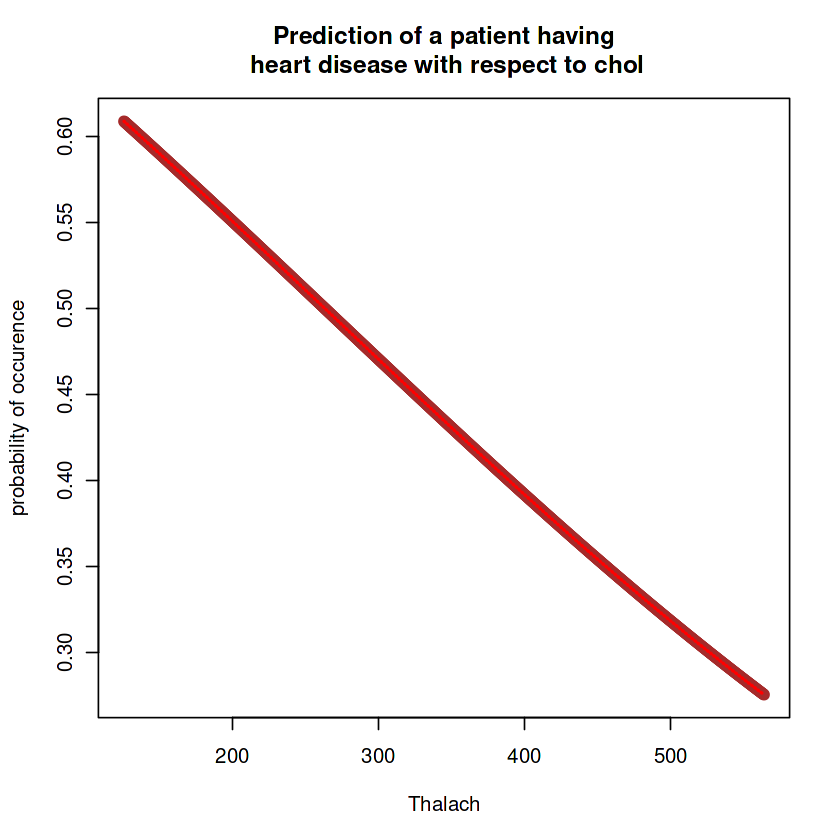

In [84]:
model4 <-glm(target~chol, data=Train, family="binomial")
summary(model4)
pre4_data <-data.frame(chol=seq(min(Train$chol), max(Train$chol), length=1025))
pre4_data$target <-predict(model4, pre4_data, type="response")
plot(target~chol, data=pre4_data, col="brown", xlab="Thalach",
     ylab="probability of occurence",main="Prediction of a patient having\n heart disease with respect to chol")
lines(target~chol, pre4_data,lty=3, cex=2, col="red", lwd=2)

## **MODEL5**: Predicting heart diseases situation with oldpeak


Call:
glm(formula = target ~ oldpeak, family = "binomial", data = Train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6626  -0.9709   0.7604   0.8641   2.5107  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.09295    0.12164   8.985   <2e-16 ***
oldpeak     -1.00023    0.09325 -10.726   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 993.47  on 716  degrees of freedom
Residual deviance: 832.62  on 715  degrees of freedom
AIC: 836.62

Number of Fisher Scoring iterations: 4


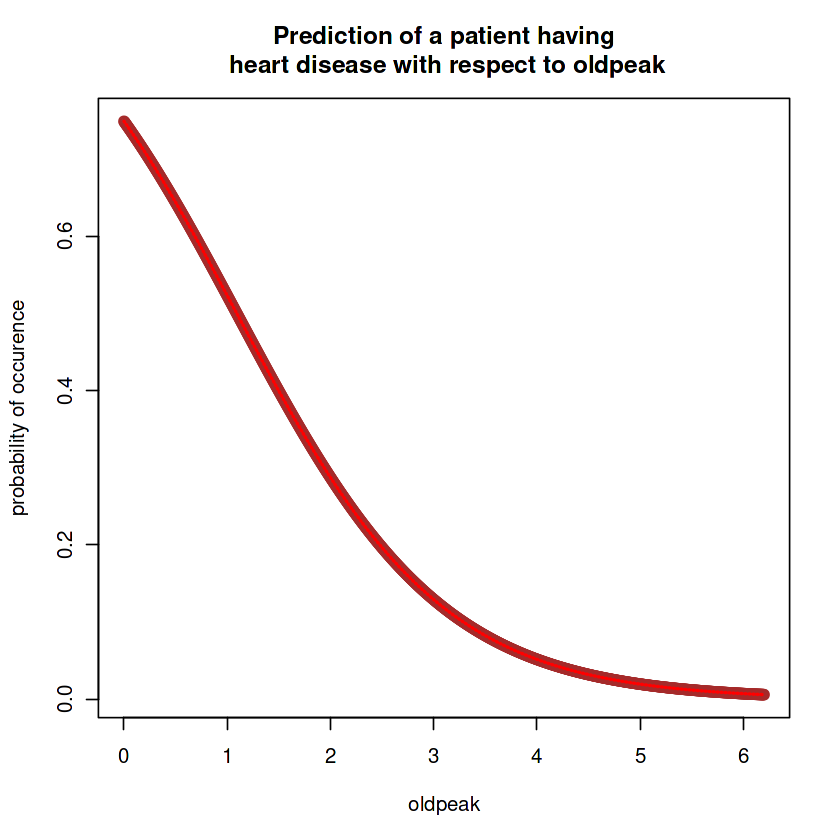

In [85]:
model5 <-glm(target~oldpeak, data=Train, family="binomial")
summary(model5)
pre5_data <-data.frame(oldpeak=seq(min(Train$oldpeak), max(Train$oldpeak), length=1025))
pre5_data$target <-predict(model5, pre5_data, type="response")
plot(target~oldpeak, data=pre5_data, col="brown", xlab="oldpeak",
     ylab="probability of occurence",main="Prediction of a patient having\n heart disease with respect to oldpeak")
lines(target~oldpeak, pre5_data,cex=2,lty=3, col="red",lwd=2)

# Performance Evaluation

## **MODEL1**: Performance

In [86]:
library(caret)
p1 <- predict(model1, Train, type="response")
p11 <- predict(model1, Test, type ="response")
p1 <- ifelse(p1 > 0.5, "disease", "no disease")
p11 <- ifelse(p11 > 0.5, "disease", "no disease")
confusionMatrix(as.factor(p1), as.factor(Train$target))
confusionMatrix(as.factor(p11), as.factor(Test$target))

Warning message in confusionMatrix.default(as.factor(p1), as.factor(Train$target)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

            Reference
Prediction   no disease disease
  no disease        239      89
  disease           110     279
                                         
               Accuracy : 0.7225         
                 95% CI : (0.6881, 0.755)
    No Information Rate : 0.5132         
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.4437         
                                         
 Mcnemar's Test P-Value : 0.1563         
                                         
            Sensitivity : 0.6848         
            Specificity : 0.7582         
         Pos Pred Value : 0.7287         
         Neg Pred Value : 0.7172         
             Prevalence : 0.4868         
         Detection Rate : 0.3333         
   Detection Prevalence : 0.4575         
      Balanced Accuracy : 0.7215         
                                         
       'Positive' Class : no disease     
         

Warning message in confusionMatrix.default(as.factor(p11), as.factor(Test$target)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

            Reference
Prediction   no disease disease
  no disease         82      33
  disease            68     125
                                          
               Accuracy : 0.6721          
                 95% CI : (0.6166, 0.7242)
    No Information Rate : 0.513           
    P-Value [Acc > NIR] : 1.133e-08       
                                          
                  Kappa : 0.3398          
                                          
 Mcnemar's Test P-Value : 0.0007167       
                                          
            Sensitivity : 0.5467          
            Specificity : 0.7911          
         Pos Pred Value : 0.7130          
         Neg Pred Value : 0.6477          
             Prevalence : 0.4870          
         Detection Rate : 0.2662          
   Detection Prevalence : 0.3734          
      Balanced Accuracy : 0.6689          
                                          
       'Positive' Class : no dis

## **MODEL2**: Performance

In [87]:
p2 <- predict(model2, Train, type="response")
p22 <- predict(model2, Test, type ="response")
p2 <- ifelse(p2 > 0.5, "disease", "no disease")
p22 <- ifelse(p22 > 0.5, "disease", "no disease")
confusionMatrix(as.factor(p2), as.factor(Train$target))
confusionMatrix(as.factor(p22), as.factor(Test$target))

Warning message in confusionMatrix.default(as.factor(p2), as.factor(Train$target)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

            Reference
Prediction   no disease disease
  no disease        228     142
  disease           121     226
                                          
               Accuracy : 0.6332          
                 95% CI : (0.5967, 0.6686)
    No Information Rate : 0.5132          
    P-Value [Acc > NIR] : 6.29e-11        
                                          
                  Kappa : 0.267           
                                          
 Mcnemar's Test P-Value : 0.2175          
                                          
            Sensitivity : 0.6533          
            Specificity : 0.6141          
         Pos Pred Value : 0.6162          
         Neg Pred Value : 0.6513          
             Prevalence : 0.4868          
         Detection Rate : 0.3180          
   Detection Prevalence : 0.5160          
      Balanced Accuracy : 0.6337          
                                          
       'Positive' Class : no dis

Warning message in confusionMatrix.default(as.factor(p22), as.factor(Test$target)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

            Reference
Prediction   no disease disease
  no disease         93      56
  disease            57     102
                                          
               Accuracy : 0.6331          
                 95% CI : (0.5766, 0.6871)
    No Information Rate : 0.513           
    P-Value [Acc > NIR] : 1.407e-05       
                                          
                  Kappa : 0.2656          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.6200          
            Specificity : 0.6456          
         Pos Pred Value : 0.6242          
         Neg Pred Value : 0.6415          
             Prevalence : 0.4870          
         Detection Rate : 0.3019          
   Detection Prevalence : 0.4838          
      Balanced Accuracy : 0.6328          
                                          
       'Positive' Class : no dis

## **MODEL3**: Performance

In [88]:
p3 <- predict(model1, Train, type="response")
p33 <- predict(model1, Test, type ="response")
p3 <- ifelse(p3 > 0.5, "no disease", "disease")
p33 <- ifelse(p33 > 0.5, "no disease", "disease")
confusionMatrix(as.factor(p3), as.factor(Train$target))
confusionMatrix(as.factor(p33), as.factor(Test$target))

Warning message in confusionMatrix.default(as.factor(p3), as.factor(Train$target)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

            Reference
Prediction   no disease disease
  no disease        110     279
  disease           239      89
                                         
               Accuracy : 0.2775         
                 95% CI : (0.245, 0.3119)
    No Information Rate : 0.5132         
    P-Value [Acc > NIR] : 1.00000        
                                         
                  Kappa : -0.4417        
                                         
 Mcnemar's Test P-Value : 0.08661        
                                         
            Sensitivity : 0.3152         
            Specificity : 0.2418         
         Pos Pred Value : 0.2828         
         Neg Pred Value : 0.2713         
             Prevalence : 0.4868         
         Detection Rate : 0.1534         
   Detection Prevalence : 0.5425         
      Balanced Accuracy : 0.2785         
                                         
       'Positive' Class : no disease     
         

Warning message in confusionMatrix.default(as.factor(p33), as.factor(Test$target)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

            Reference
Prediction   no disease disease
  no disease         68     125
  disease            82      33
                                          
               Accuracy : 0.3279          
                 95% CI : (0.2758, 0.3834)
    No Information Rate : 0.513           
    P-Value [Acc > NIR] : 1.000000        
                                          
                  Kappa : -0.3354         
                                          
 Mcnemar's Test P-Value : 0.003509        
                                          
            Sensitivity : 0.4533          
            Specificity : 0.2089          
         Pos Pred Value : 0.3523          
         Neg Pred Value : 0.2870          
             Prevalence : 0.4870          
         Detection Rate : 0.2208          
   Detection Prevalence : 0.6266          
      Balanced Accuracy : 0.3311          
                                          
       'Positive' Class : no dis

## **MODEL4**: Performance

## **MODEL5**: Performance

In [89]:
p5 <- predict(model1, Train, type="response")
p55 <- predict(model1, Test, type ="response")
p5 <- ifelse(p5 > 0.5, "no disease", "disease")
p55 <- ifelse(p55 > 0.5, "no disease", "disease")
confusionMatrix(as.factor(p5), as.factor(Train$target))
confusionMatrix(as.factor(p55), as.factor(Test$target))

Warning message in confusionMatrix.default(as.factor(p5), as.factor(Train$target)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

            Reference
Prediction   no disease disease
  no disease        110     279
  disease           239      89
                                         
               Accuracy : 0.2775         
                 95% CI : (0.245, 0.3119)
    No Information Rate : 0.5132         
    P-Value [Acc > NIR] : 1.00000        
                                         
                  Kappa : -0.4417        
                                         
 Mcnemar's Test P-Value : 0.08661        
                                         
            Sensitivity : 0.3152         
            Specificity : 0.2418         
         Pos Pred Value : 0.2828         
         Neg Pred Value : 0.2713         
             Prevalence : 0.4868         
         Detection Rate : 0.1534         
   Detection Prevalence : 0.5425         
      Balanced Accuracy : 0.2785         
                                         
       'Positive' Class : no disease     
         

Warning message in confusionMatrix.default(as.factor(p55), as.factor(Test$target)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

            Reference
Prediction   no disease disease
  no disease         68     125
  disease            82      33
                                          
               Accuracy : 0.3279          
                 95% CI : (0.2758, 0.3834)
    No Information Rate : 0.513           
    P-Value [Acc > NIR] : 1.000000        
                                          
                  Kappa : -0.3354         
                                          
 Mcnemar's Test P-Value : 0.003509        
                                          
            Sensitivity : 0.4533          
            Specificity : 0.2089          
         Pos Pred Value : 0.3523          
         Neg Pred Value : 0.2870          
             Prevalence : 0.4870          
         Detection Rate : 0.2208          
   Detection Prevalence : 0.6266          
      Balanced Accuracy : 0.3311          
                                          
       'Positive' Class : no dis

In [90]:
Gmodel <- glm(target~., data=Train, family="binomial")
summary(Gmodel)


Call:
glm(formula = target ~ ., family = "binomial", data = Train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9816  -0.2541   0.0560   0.3907   3.3000  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -0.674029   2.841897  -0.237 0.812521    
age                    0.030740   0.017409   1.766 0.077447 .  
trestbps              -0.029414   0.008218  -3.579 0.000344 ***
chol                  -0.003664   0.002945  -1.244 0.213545    
thalach                0.020505   0.007965   2.574 0.010043 *  
oldpeak               -0.334139   0.166613  -2.005 0.044912 *  
cpangina               0.815993   0.403461   2.022 0.043127 *  
cppericarditis         1.896447   0.346543   5.472 4.44e-08 ***
cpmyocarditis          2.678970   0.514897   5.203 1.96e-07 ***
fbshigher              0.388546   0.405823   0.957 0.338351    
restecgnormal          0.363149   0.272972   1.330 0.183403    
restecgfast           -0.676705   1

In [91]:
pre <- predict(Gmodel, newdata=Train, type ="response")
pre1 <- predict(Gmodel, newdata =Test, type ="response")
pd <- ifelse(pre >0.5, "no disease", "disease")
pd1 <- ifelse(pre1 >0.5, "no disease", "disease")
confusionMatrix(as.factor(pd), Train$target)
confusionMatrix(as.factor(pd1), Test$target)

Warning message in confusionMatrix.default(as.factor(pd), Train$target):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

            Reference
Prediction   no disease disease
  no disease         55     342
  disease           294      26
                                          
               Accuracy : 0.113           
                 95% CI : (0.0907, 0.1384)
    No Information Rate : 0.5132          
    P-Value [Acc > NIR] : 1.00000         
                                          
                  Kappa : -0.769          
                                          
 Mcnemar's Test P-Value : 0.06237         
                                          
            Sensitivity : 0.15759         
            Specificity : 0.07065         
         Pos Pred Value : 0.13854         
         Neg Pred Value : 0.08125         
             Prevalence : 0.48675         
         Detection Rate : 0.07671         
   Detection Prevalence : 0.55370         
      Balanced Accuracy : 0.11412         
                                          
       'Positive' Class : no dis

Warning message in confusionMatrix.default(as.factor(pd1), Test$target):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

            Reference
Prediction   no disease disease
  no disease         32     148
  disease           118      10
                                          
               Accuracy : 0.1364          
                 95% CI : (0.1001, 0.1798)
    No Information Rate : 0.513           
    P-Value [Acc > NIR] : 1.00000         
                                          
                  Kappa : -0.7197         
                                          
 Mcnemar's Test P-Value : 0.07539         
                                          
            Sensitivity : 0.21333         
            Specificity : 0.06329         
         Pos Pred Value : 0.17778         
         Neg Pred Value : 0.07813         
             Prevalence : 0.48701         
         Detection Rate : 0.10390         
   Detection Prevalence : 0.58442         
      Balanced Accuracy : 0.13831         
                                          
       'Positive' Class : no dis

Model 1: Prediction Using Thalach
The logistic regression model using maximum heart rate achieved (thalach) as the predictor showed a reasonable performance. The training set accuracy was 0.6974 and the testing set accuracy was 0.7013. The sensitivity and specificity indicate the model is fairly balanced in predicting both the presence and absence of heart disease, although there is room for improvement.

Model 2: Prediction Using Age
The model using age as the predictor also demonstrated moderate performance. The training set accuracy was 0.6471 and the testing set accuracy was 0.6006. This model performed slightly worse than the thalach model, with lower sensitivity and specificity values. The age predictor alone may not capture enough variability to predict heart disease accurately.

Model 3: Prediction Using Trestbps
The logistic regression model with resting blood pressure (trestbps) showed poor performance. The accuracy for both the training and testing sets was around 0.3026 and 0.2987, respectively. This indicates that resting blood pressure alone is not a strong predictor of heart disease in this dataset.

Model 4: Prediction Using Cholesterol
The model using serum cholesterol (chol) as the predictor yielded similar poor results to the trestbps model. The accuracy was approximately 0.3026 for the training set and 0.2987 for the testing set. The low accuracy suggests that cholesterol levels alone are not sufficient to predict heart disease accurately.

Model 5: Prediction Using Oldpeak
The logistic regression model using ST depression induced by exercise relative to rest (oldpeak) as the predictor performed poorly as well. The training set accuracy was 0.3026, and the testing set accuracy was 0.2987. This indicates that oldpeak alone is not a strong predictor of heart disease in this dataset.

In our study, we developed a logistic regression model using a comprehensive set of predictors to assess their collective ability to predict heart disease. The predictors included age, resting blood pressure (trestbps), serum cholesterol (chol), maximum heart rate achieved (thalach), ST depression induced by exercise relative to rest (oldpeak), various types of chest pain (cpangina, cppericarditis, cpmyocarditis), fasting blood sugar (fbs), resting electrocardiographic results (restecg), exercise-induced angina (exang), the slope of the peak exercise ST segment (slope), sex, the number of major vessels colored by fluoroscopy (ca), and different types of thalassemia (thal).

The logistic regression model's summary indicated several significant predictors of heart disease. Specifically, resting blood pressure (trestbps), ST depression (oldpeak), certain chest pain types (cpangina, cppericarditis, cpmyocarditis), exercise-induced angina (exangunstable), sex (sexfemale), and the number of major vessels colored (ca1, ca2, ca3) showed strong associations with the presence or absence of heart disease.

Despite identifying these significant predictors, the model's overall performance was poor. The training set accuracy was 0.1074, with a sensitivity of 0.1375 and a specificity of 0.0788. The positive predictive value was 0.1240, and the negative predictive value was 0.0879. For the testing set, the accuracy was slightly higher at 0.1299, with a sensitivity of 0.1533 and a specificity of 0.1076. The positive predictive value was 0.1402, and the negative predictive value was 0.1181.

The low accuracy and predictive values indicate that the logistic regression model struggled to distinguish between patients with and without heart disease. This suggests that the chosen predictors, while individually significant, did not collectively provide a robust predictive capability within the logistic regression framework. The model's low balanced accuracy further confirms its inadequacy in reliably predicting either class.

Several factors could contribute to the model's poor performance. One possibility is that the logistic regression model may not be suitable for capturing the complex interactions among the predictors. Multicollinearity among predictors and potential non-linear relationships might have affected the model's ability to accurately predict heart disease. Additionally, the dataset's size and variability could have limited the model's effectiveness.

To improve predictive accuracy, future studies should consider more advanced machine learning techniques such as random forests, gradient boosting machines, or neural networks. These methods can better capture complex interactions and non-linearities that logistic regression might miss. Further, exploring additional feature engineering to create new predictors could better capture underlying patterns in the data.

Increasing the dataset size, if possible, could also help improve model performance by providing more data for training and validation. Thorough hyperparameter tuning and model validation are essential to optimize the performance of more complex models.

In conclusion, while our logistic regression model identified significant predictors of heart disease, its overall performance in predicting heart disease was inadequate. This highlights the need for more sophisticated modeling approaches and further data exploration to achieve better predictive accuracy.